In [207]:
# Import the libraries 
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [208]:
# Import the data
bikes=pd.DataFrame()

In [209]:
bikes=pd.read_csv("hour.csv")

In [210]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Removing redundant and unwanted data, 'instant' is just an index value, 'dteday' is not useful as we have 'year' and 'month' and 'casual' and 'registered' are not useful as we need the total count of bikes.

In [212]:
columns_to_drop = ['instant', 'dteday','casual', 'registered']
bikes = bikes.drop(columns=[col for col in columns_to_drop if col in bikes.columns])

## Check the data types of columns

In [214]:
bikes.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

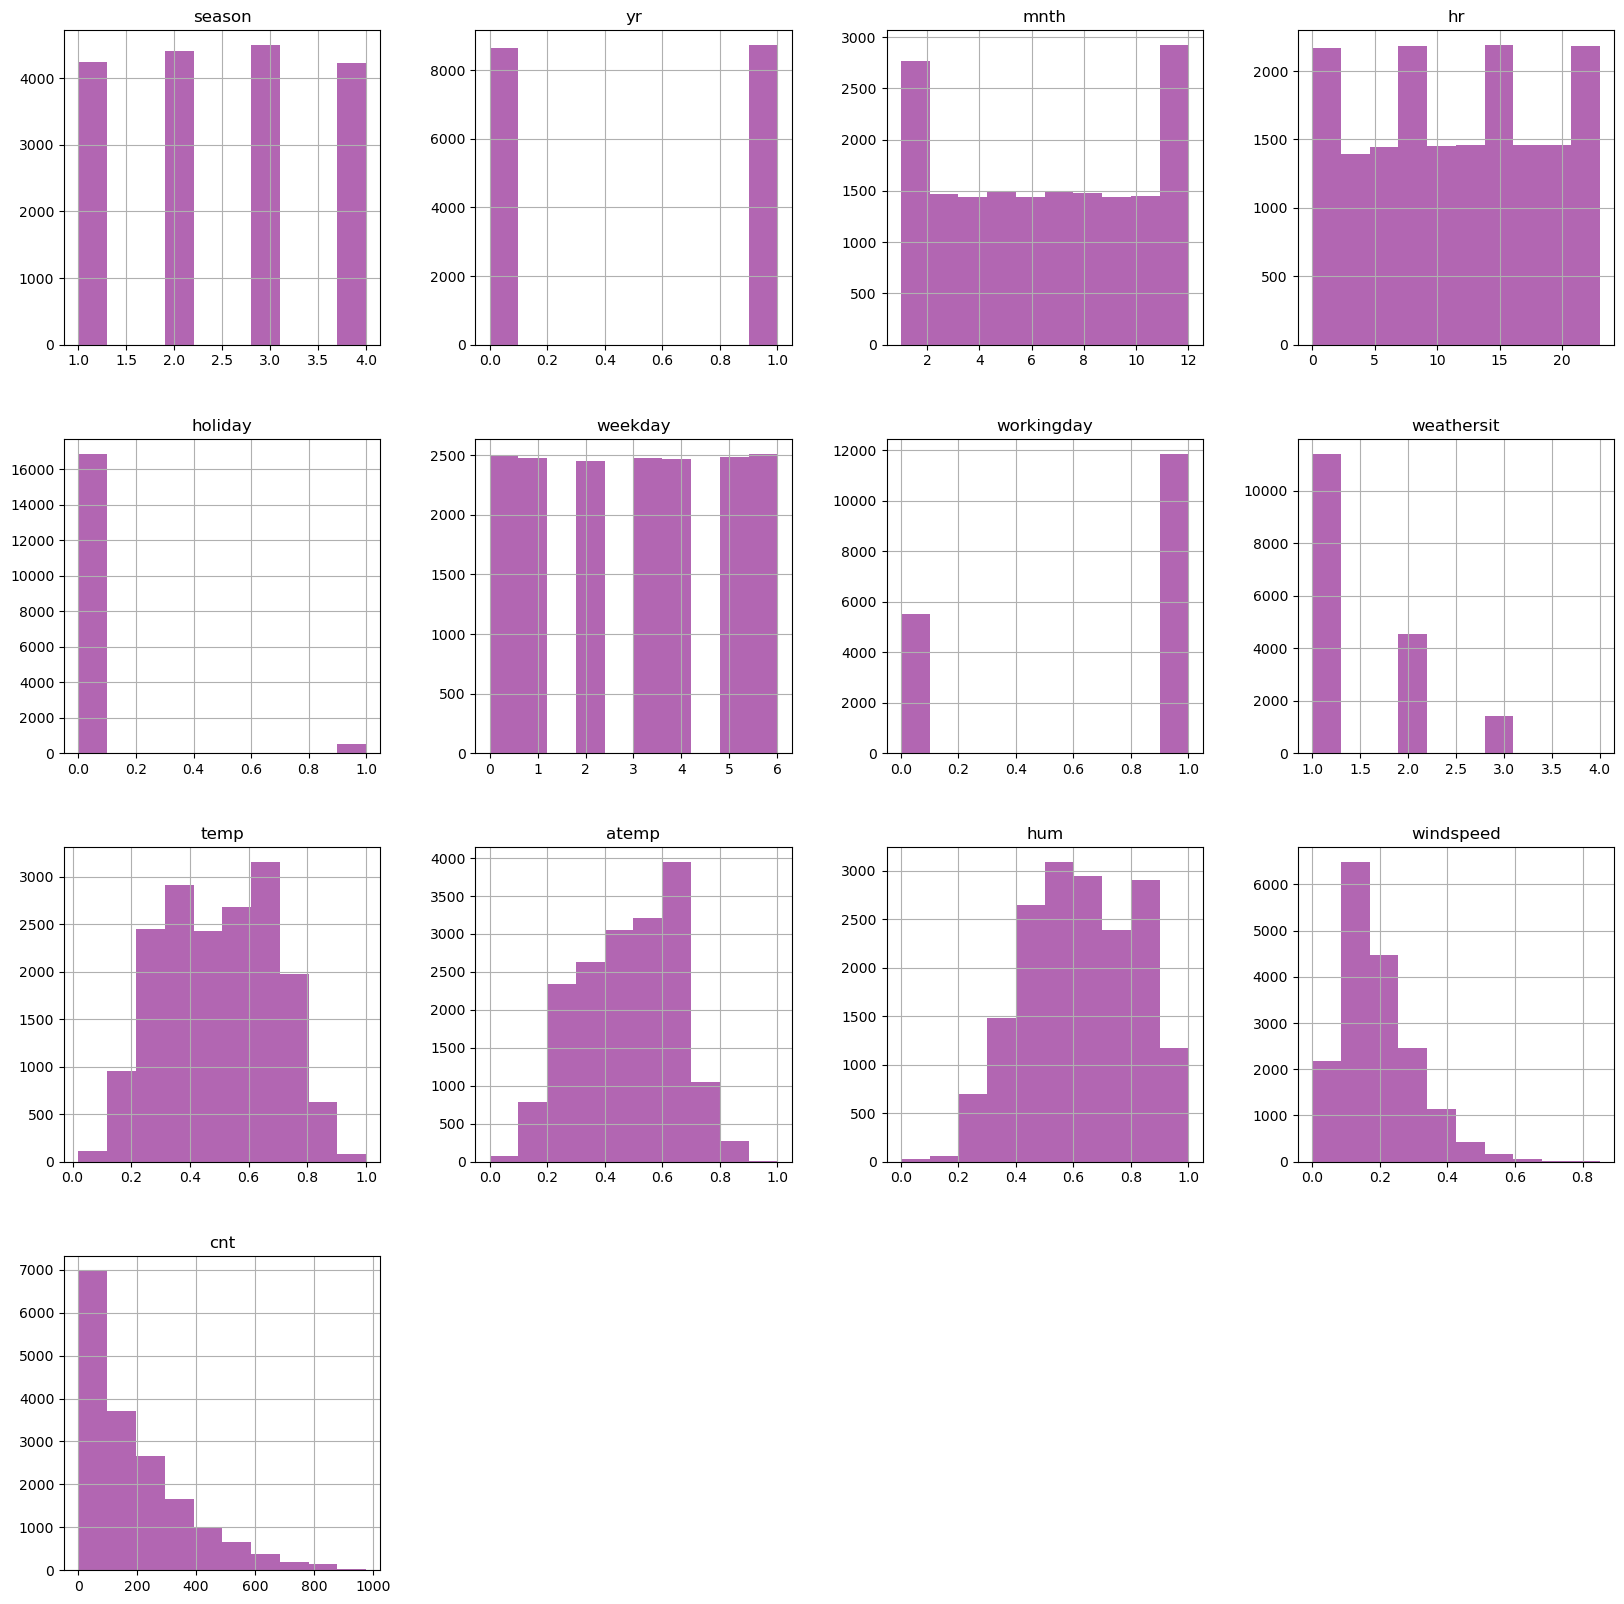

In [215]:
bikes.hist(figsize=(20,20),color='purple',alpha=0.6)
plt.show()

## Pre processing data

#### Check for missing values

In [217]:
bikes.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Look the descriptive statistics

In [219]:
bikes.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


### Dummy variables

#### Create dummy variables for the categoricals features (season, month, weekday, season and weathersit)
#### First, it is neccesary to convert them into categorical data types

In [221]:
bikes['season']=bikes['season'].astype('category')
bikes['weathersit']=bikes['weathersit'].astype('category')
bikes['mnth']=bikes['mnth'].astype('category')
bikes['weekday']=bikes['weekday'].astype('category')

#### Check the info again

In [223]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  int64   
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  int64   
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  int64   
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  cnt         17379 non-null  int64   
dtypes: category(4), float64(4), int64(5)
memory usage: 1.3 MB


#### Create the dummy variables (drop first variable)

In [225]:
bikes_dm = pd.get_dummies(bikes, drop_first=True)
bikes_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   hr            17379 non-null  int64  
 2   holiday       17379 non-null  int64  
 3   workingday    17379 non-null  int64  
 4   temp          17379 non-null  float64
 5   atemp         17379 non-null  float64
 6   hum           17379 non-null  float64
 7   windspeed     17379 non-null  float64
 8   cnt           17379 non-null  int64  
 9   season_2      17379 non-null  bool   
 10  season_3      17379 non-null  bool   
 11  season_4      17379 non-null  bool   
 12  mnth_2        17379 non-null  bool   
 13  mnth_3        17379 non-null  bool   
 14  mnth_4        17379 non-null  bool   
 15  mnth_5        17379 non-null  bool   
 16  mnth_6        17379 non-null  bool   
 17  mnth_7        17379 non-null  bool   
 18  mnth_8        17379 non-nu

## Splitting the data
#### Doing this before visualizations so that training visualizations will be representative for the model in general

## Perform exploratory data analysis on training dataset
#### Check the relationship between numerical variables

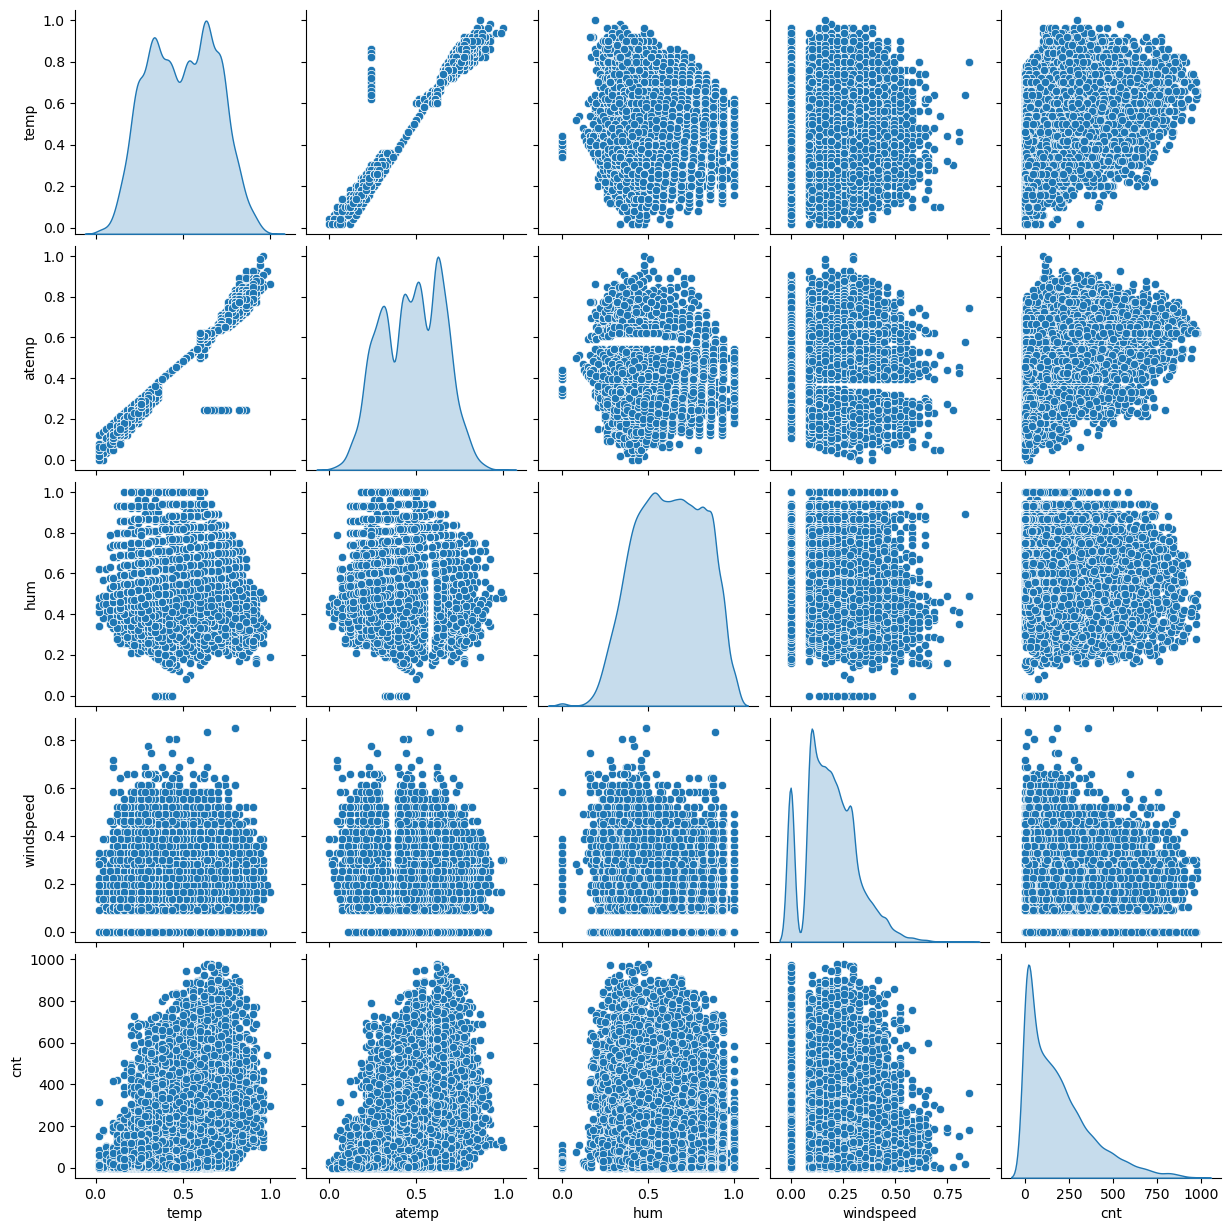

In [228]:
bikes_n=bikes_dm[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bikes_n, diag_kind='kde')
plt.show()

#### There is a linear relation between temp and atemp 

## Visualising categorical variables

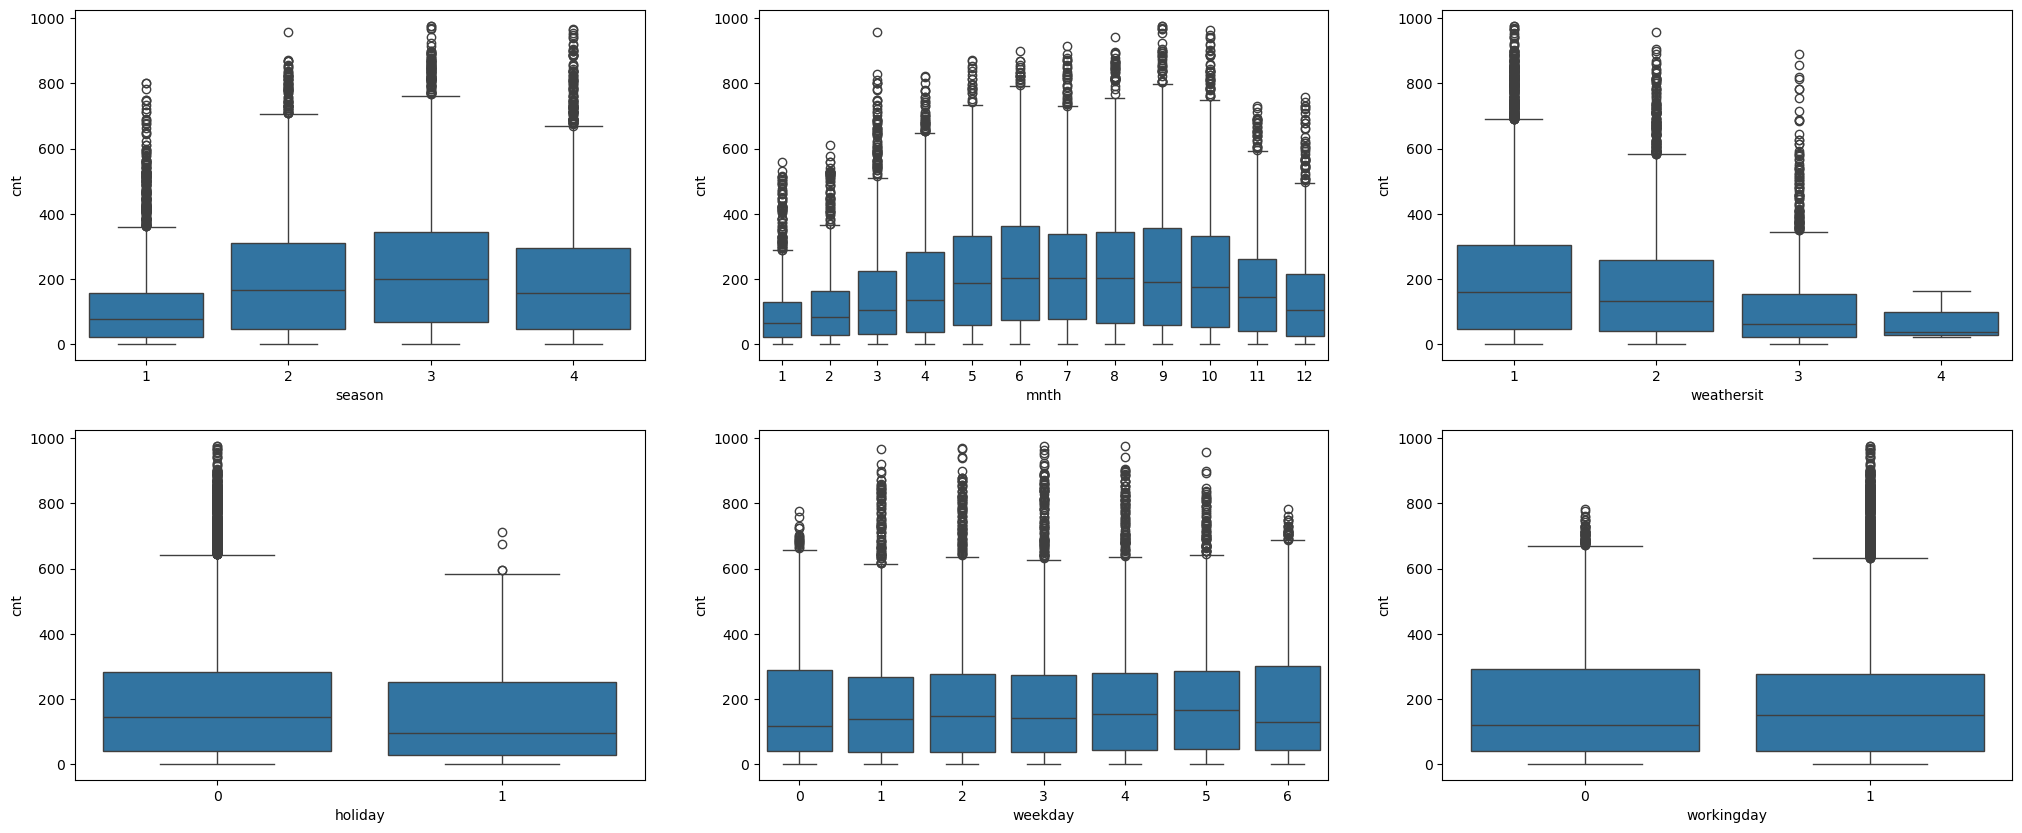

In [231]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

#### There are many outliers in these categories, I keep them considering important events.

## Correlation matrix

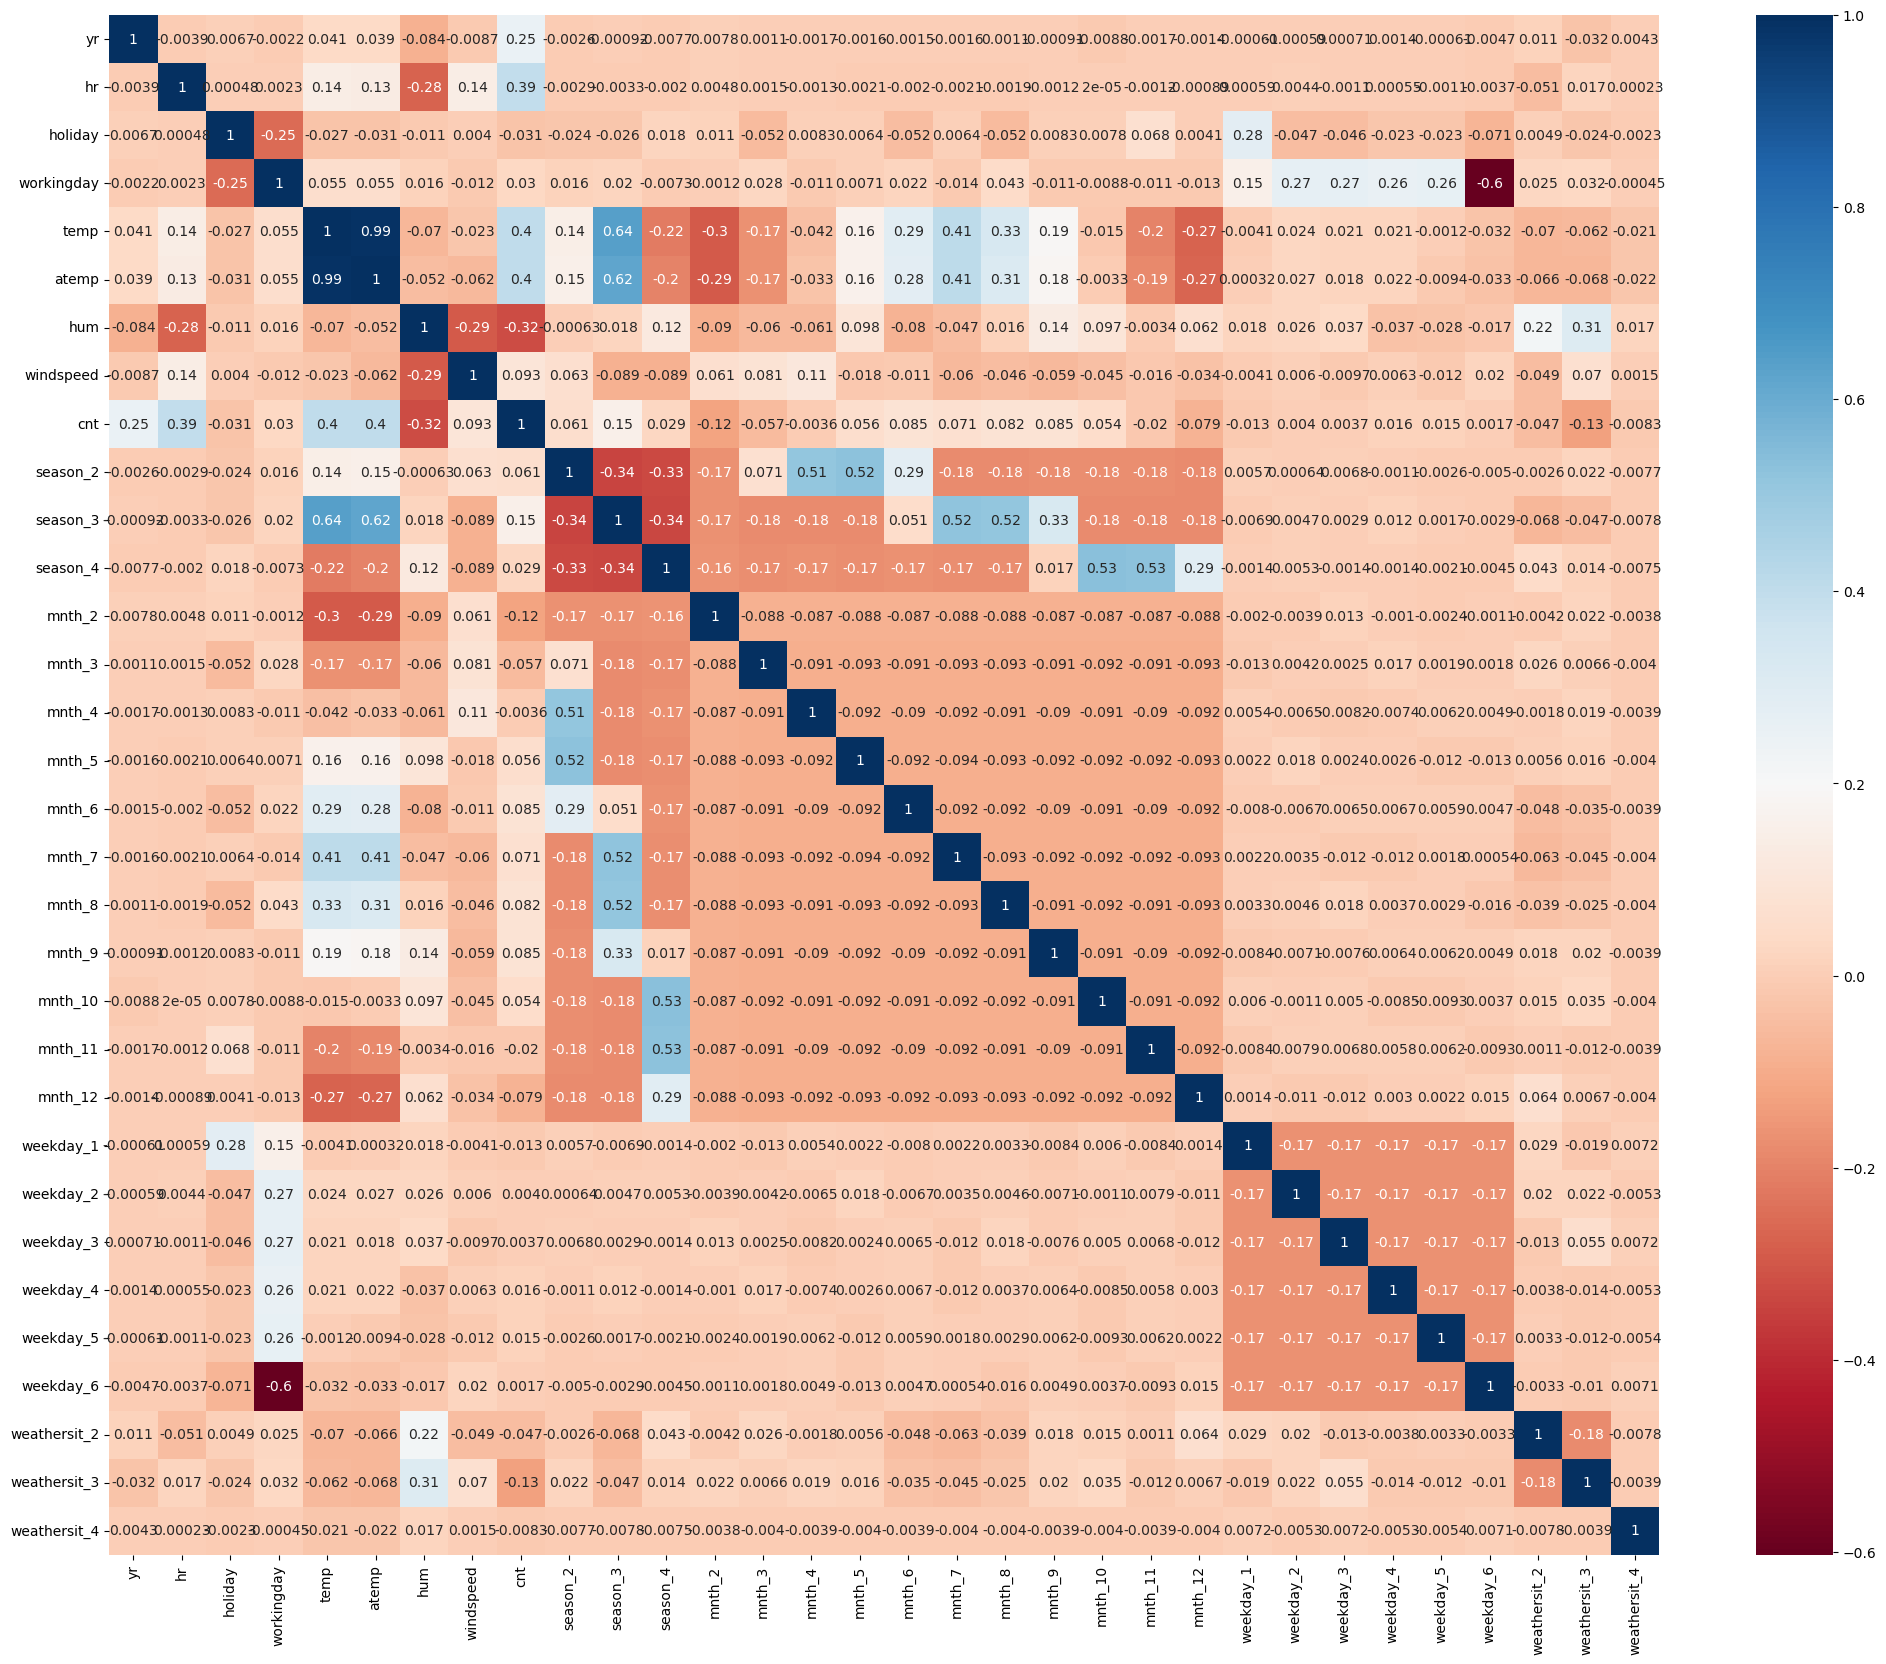

In [234]:
plt.figure(figsize = (25,20))
sns.heatmap(bikes_dm.corr(), annot = True, cmap="RdBu")
plt.show()

#### From the correlation matrix we can see temp and atemp are higly correlated, so I will drop 'atemp' because is just the feeling temperature and 'temp' as we have weather situation.

In [236]:
bikes_dm.drop(["atemp", "temp"],axis=1,inplace=True)

In [237]:
bikes_dm.head()

,yr,hr,holiday,workingday,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0,0.81,0.0,16,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0,1,0,0,0.80,0.0,40,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,2,0,0,0.80,0.0,32,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,3,0,0,0.75,0.0,13,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,4,0,0,0.75,0.0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## Model building 

## Linear Regression 

In [240]:
X = bikes_dm.drop('cnt', axis=1)
y = bikes_dm['cnt']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [243]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Add the constant for the intercept
X_train_lr = sm.add_constant(X_train)
X_test_lr = sm.add_constant(X_test, has_constant="add")

lin_model_lr = sm.OLS(y_train, X_train_lr).fit()

# See the summary for the coefficients
print(lin_model_lr.summary())

y_pred_lin = lin_model_lr.predict(X_test_lr) 

mse = mean_squared_error(y_test, y_pred_lin)  
mae = mean_absolute_error(y_test, y_pred_lin)  
r2 = r2_score(y_test, y_pred_lin)  

print("\nLinear Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     243.2
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:14:01   Log-Likelihood:                -89401.
No. Observations:               13903   AIC:                         1.789e+05
Df Residuals:                   13875   BIC:                         1.791e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -74.3485      6.044    -12.301   

#### Due to the strong multicollinearity, remove some not significant columns

In [245]:
X_train = X_train.drop(['holiday', 'hum', 'windspeed', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_4'], axis=1)
X_test = X_test.drop(['holiday', 'hum', 'windspeed', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_4'], axis=1)


In [246]:
# Add the constant for the intercept
X_train_lr2 = sm.add_constant(X_train)
X_test_lr2 = sm.add_constant(X_test, has_constant="add")

lin_model_lr2 = sm.OLS(y_train, X_train_lr2).fit()

# See the summary for the coefficients
print(lin_model_lr2.summary())

y_pred_lin = lin_model_lr2.predict(X_test_lr2) 

mse = mean_squared_error(y_test, y_pred_lin)  
mae = mean_absolute_error(y_test, y_pred_lin)  
r2 = r2_score(y_test, y_pred_lin)  

print("\nLinear Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     364.3
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:14:01   Log-Likelihood:                -89406.
No. Observations:               13903   AIC:                         1.788e+05
Df Residuals:                   13884   BIC:                         1.790e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -74.7817      5.308    -14.089   

## Random Forest

In [248]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Adjusted R-squared
n = X_test.shape[0] 
k = X_test.shape[1]  

adjusted_r2_rf = 1 - (1 - r2_rf) * ((n - 1) / (n - k - 1))

# Print the results
print("Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")
print(f"Adjusted R-squared: {adjusted_r2_rf}")


Random Forest Regression Metrics:
Mean Squared Error (MSE): 2310.53759656858
Mean Absolute Error (MAE): 29.64214893510147
R-squared (R²): 0.9270327622774812
Adjusted R-squared: 0.9264187025288007


## Decision Tree

In [250]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)

#Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

n = X_test.shape[0]  
k = X_test.shape[1]  

adjusted_r2_dt = 1 - (1 - r2_dt) * ((n - 1) / (n - k - 1))

print("Decision Tree Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared (R²): {r2_dt}")
print(f"Adjusted R-squared: {adjusted_r2_dt}")

Decision Tree Regression Metrics:
Mean Squared Error (MSE): 3982.742592059839
Mean Absolute Error (MAE): 37.938291139240505
R-squared (R²): 0.8742241952980896
Adjusted R-squared: 0.873165722188294


## Feature importance

In [252]:
import pandas as pd
import numpy as np

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


         Feature  Importance
1             hr    0.551800
3     workingday    0.111645
0             yr    0.085951
4            hum    0.049740
7       season_3    0.033204
6       season_2    0.024769
8       season_4    0.023871
5      windspeed    0.019559
27  weathersit_3    0.017328
17       mnth_10    0.009927
16        mnth_9    0.009335
10        mnth_3    0.008671
9         mnth_2    0.008186
19       mnth_12    0.007485
24     weekday_5    0.005818
26  weathersit_2    0.004412
25     weekday_6    0.003965
13        mnth_6    0.003319
11        mnth_4    0.002918
20     weekday_1    0.002475
23     weekday_4    0.002468
12        mnth_5    0.002428
2        holiday    0.002387
18       mnth_11    0.002104
22     weekday_3    0.001909
21     weekday_2    0.001868
14        mnth_7    0.001423
15        mnth_8    0.001026
28  weathersit_4    0.000007


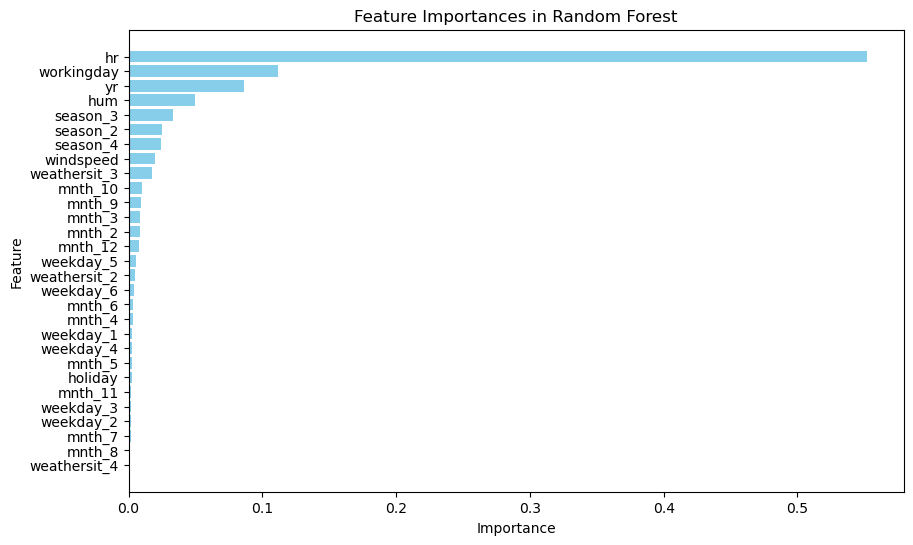

In [253]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.show()
